In [1]:
import pandas as pd
import json
import numpy as np
from pprint import pprint

with open('server_log.json', 'r') as server_log_json:
    json_data = json.load(server_log_json)

log_df = pd.DataFrame(json_data)
log_df

,context,level,message,timestamp,stack,address,error
0,HttpExceptionFilter,warn,113.148.63.164 HTTP/:1.1 NoSQLInjector: Alpha ...,2024-05-09T13:54:11.640Z,NaN,NaN,NaN
1,HttpExceptionFilter,warn,167.83.213.15 HTTP/:1.1 NoSQLInjector: Alpha v...,2024-05-09T13:54:11.640Z,NaN,NaN,NaN
2,HttpExceptionFilter,warn,61.187.163.29 HTTP/:1.1 NoSQLInjector: Alpha v...,2024-05-09T13:54:11.640Z,NaN,NaN,NaN
3,HttpExceptionFilter,warn,64.129.237.15 HTTP/:1.1 NoSQLInjector: Alpha v...,2024-05-09T13:54:11.641Z,NaN,NaN,NaN
4,HttpExceptionFilter,warn,180.251.75.158 HTTP/:1.1 NoSQLInjector: Alpha ...,2024-05-09T13:54:11.641Z,NaN,NaN,NaN
...,...,...,...,...,...,...,...
37303,HttpExceptionFilter,info,30.35.141.205 HTTP/:1.1 ${jndi:ldap://log4shel...,2024-06-12T07:52:03.738Z,NaN,NaN,NaN
37304,HttpExceptionFilter,info,230.78.111.190 HTTP/:1.1 ${jndi:ldap://log4she...,2024-06-12T07:52:09.164Z,NaN,NaN,NaN
37305,HttpExceptionFilter,info,119.55.85.78 HTTP/:1.1 ${jndi:ldap://log4shell...,2024-06-12T07:52:14.585Z,NaN,NaN,NaN
37306,CRON,info,[START] - Generate checking expired movies,2024-06-12T09:00:00.038Z,NaN,NaN,NaN


In [2]:
# remove init log entry
log_df['context'].unique()

log_df.drop('stack', axis=1, inplace=True)
log_df.drop('address', axis=1, inplace=True)
log_df.drop('error', axis=1, inplace=True)
log_df[log_df.isnull().any(axis=1)]

values_to_remove = [
    'NestFactory',
    'InstanceLoader',
    'RoutesResolver',
    'RouterExplorer',
    'NestApplication',
    np.NaN
]
log_df.drop(log_df[log_df['context'].isin(values_to_remove)].index, inplace=True)
log_df

,context,level,message,timestamp
0,HttpExceptionFilter,warn,113.148.63.164 HTTP/:1.1 NoSQLInjector: Alpha ...,2024-05-09T13:54:11.640Z
1,HttpExceptionFilter,warn,167.83.213.15 HTTP/:1.1 NoSQLInjector: Alpha v...,2024-05-09T13:54:11.640Z
2,HttpExceptionFilter,warn,61.187.163.29 HTTP/:1.1 NoSQLInjector: Alpha v...,2024-05-09T13:54:11.640Z
3,HttpExceptionFilter,warn,64.129.237.15 HTTP/:1.1 NoSQLInjector: Alpha v...,2024-05-09T13:54:11.641Z
4,HttpExceptionFilter,warn,180.251.75.158 HTTP/:1.1 NoSQLInjector: Alpha ...,2024-05-09T13:54:11.641Z
...,...,...,...,...
37303,HttpExceptionFilter,info,30.35.141.205 HTTP/:1.1 ${jndi:ldap://log4shel...,2024-06-12T07:52:03.738Z
37304,HttpExceptionFilter,info,230.78.111.190 HTTP/:1.1 ${jndi:ldap://log4she...,2024-06-12T07:52:09.164Z
37305,HttpExceptionFilter,info,119.55.85.78 HTTP/:1.1 ${jndi:ldap://log4shell...,2024-06-12T07:52:14.585Z
37306,CRON,info,[START] - Generate checking expired movies,2024-06-12T09:00:00.038Z


In [3]:
# format message

def formatMessage(row):
    allowed_context = [
        'AuthController',
        'MovieListController',
        'OpenMovieListController',
        'OrderMovieController',
        'HttpExceptionFilter'
    ]
    timestamp = row['context']
    level = row['level'].upper()
    if row['context'] in allowed_context:
        msg_parts = row['message'].split()
        return f"{msg_parts[0]} {level} [{timestamp}] {' '.join(msg_parts[1:])}"
    else:
        return f"{level} [{timestamp}] {row['message']}"

new_log_df = log_df.apply(formatMessage, axis=1).tolist()
new_log_df

["113.148.63.164 WARN [HttpExceptionFilter] HTTP/:1.1 NoSQLInjector: Alpha v0.5.4 - 405 POST /auth/sigin 'invalid http method' 19 bytes 0 ms",
 "167.83.213.15 WARN [HttpExceptionFilter] HTTP/:1.1 NoSQLInjector: Alpha v0.5.4 - 405 POST /auth/sigin 'invalid http method' 19 bytes 0 ms",
 "61.187.163.29 WARN [HttpExceptionFilter] HTTP/:1.1 NoSQLInjector: Alpha v0.5.4 - 405 POST /auth/sigin 'invalid http method' 19 bytes 0 ms",
 "64.129.237.15 WARN [HttpExceptionFilter] HTTP/:1.1 NoSQLInjector: Alpha v0.5.4 - 405 POST /auth/sigin 'invalid http method' 19 bytes 0 ms",
 "180.251.75.158 WARN [HttpExceptionFilter] HTTP/:1.1 NoSQLInjector: Alpha v0.5.4 - 405 POST /auth/sigin 'invalid http method' 19 bytes 0 ms",
 "30.104.159.229 WARN [HttpExceptionFilter] HTTP/:1.1 NoSQLInjector: Alpha v0.5.4 - 405 POST /auth/sigin 'invalid http method' 19 bytes 0 ms",
 "15.61.69.75 WARN [HttpExceptionFilter] HTTP/:1.1 NoSQLInjector: Alpha v0.5.4 - 405 POST /auth/sigin 'invalid http method' 19 bytes 0 ms",
 "146

In [4]:
# remove non alphanumeric

import re

new_formatted_msg = [re.sub(r"[\(\)\[\]\-']", '', log_msg) for log_msg in new_log_df]

print(new_formatted_msg)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
# apply tokenization

import nltk

tokens = [nltk.word_tokenize(msg) for msg in new_formatted_msg]

print(tokens)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
from gensim.models import FastText

model = FastText(tokens)

print(model.wv['logged in'])

[ 2.690933    0.58706737  1.5428144  -1.4355332   0.12101426  0.65600175
  0.6467383  -0.6794676  -0.6128409  -0.23083688 -0.41038674 -0.83716214
  0.9296478  -1.7227249   0.9848058  -1.1270128   1.5886612   2.2887852
 -1.3511386  -2.0917227   2.1466825   0.7578401  -0.13111152 -0.80126256
  1.2941668  -2.421679    0.2857914  -2.3059356   0.47707742  2.6485074
 -0.6321399   1.9802132  -2.370511    1.3369377  -0.28484267  0.7324579
 -0.8147211   1.4118097   0.49682185 -0.6586397   2.3490007   0.29222658
  1.1388596  -0.4678992   0.5358594  -3.1434271  -2.122701   -1.8304099
 -0.43118697 -0.70093256 -1.4698716   1.8887125  -1.9445221   0.72019255
  1.0303782  -0.89860225 -1.1062115   0.88713247 -1.9517338  -3.2147741
  1.122942   -1.3450848  -2.4215906  -1.1698787  -0.02250303 -0.4229353
 -0.24138078  1.3555571  -0.05894522  1.5631211  -1.8024119  -1.4853709
 -1.7810045  -1.7540711   0.7844953  -1.0879568  -0.7620403   1.1426692
  0.51502776 -1.3694621  -0.4855914   1.4566176   1.3852671

In [7]:
# prepare word embedding

def get_word_embedding(msg):
    embeddings = [model.wv[word] for word in msg]
    avg_embedding = np.mean(embeddings, axis=0)
    return avg_embedding

msg_embeddings = [get_word_embedding(msg) for msg in tokens]

In [8]:
# prepare ml models
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import SGDOneClassSVM
from sklearn.svm import OneClassSVM

iso_forest = IsolationForest()
iso_forest.fit(msg_embeddings)
iso_scores = iso_forest.decision_function(msg_embeddings)

sgd_ocsvm = SGDOneClassSVM()
sgd_ocsvm.fit(msg_embeddings)
sgd_scores = sgd_ocsvm.decision_function(msg_embeddings)

ocsvm = OneClassSVM()
ocsvm.fit(msg_embeddings)
ocsvm_scores = ocsvm.decision_function(msg_embeddings)

print('iso forest: ', iso_scores)
print('sgd ocsvm: ', sgd_scores)
print('ocsvm: ', ocsvm_scores)

iso forest:  [-0.04087239 -0.04168078 -0.04270523 ... -0.10915177 -0.01377552
 -0.00802488]
sgd ocsvm:  [-1.54979315 -1.49907173 -1.44811103 ... -0.15263406 -8.8240555
 -7.10515871]
ocsvm:  [-1851.4639036  -1881.18932245 -1859.27326112 ... -5132.80046468
 -1582.67022072 -1283.25148353]


In [9]:
def threshold_tukey(anomaly_scores):
    Q1 = np.percentile(anomaly_scores, 25)
    Q2 = np.percentile(anomaly_scores, 50)
    Q3 = np.percentile(anomaly_scores, 75)
    
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

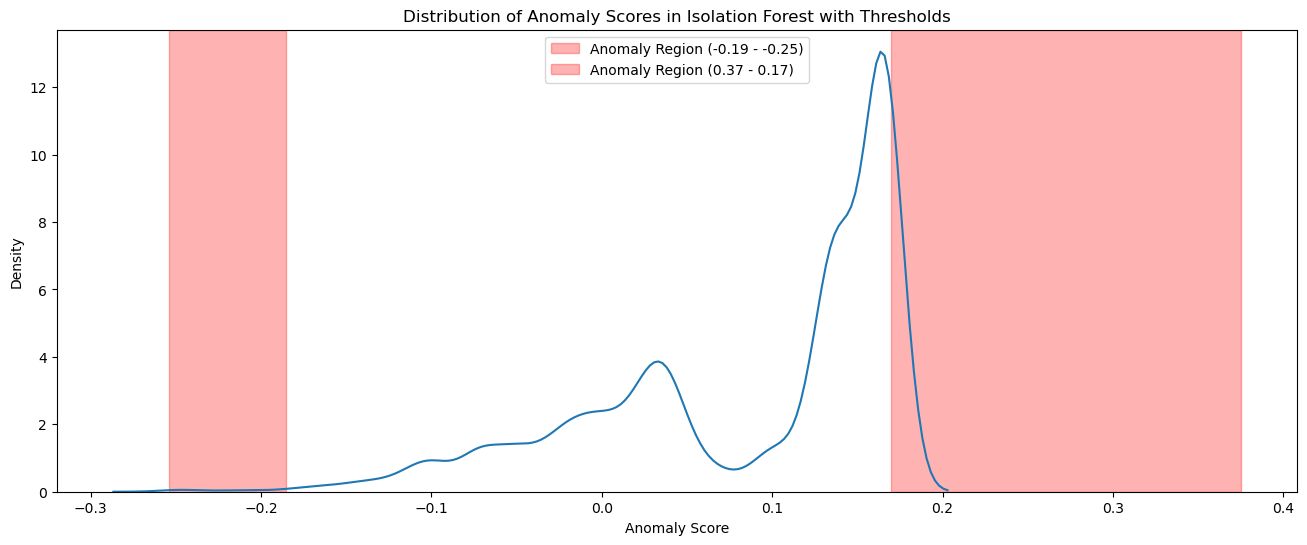

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

lower_iso, upper_iso = threshold_tukey(iso_scores)

plt.figure(figsize=(16, 6))
sns.kdeplot(iso_scores)
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.title('Distribution of Anomaly Scores in Isolation Forest with Thresholds')
plt.axvspan(xmin=lower_iso, xmax=min(iso_scores), color='red', alpha=0.3, label=f"Anomaly Region ({lower_iso:.2f} - {min(iso_scores):.2f})")
plt.axvspan(xmin=upper_iso, xmax=max(iso_scores), color='red', alpha=0.3, label=f"Anomaly Region ({upper_iso:.2f} - {max(iso_scores):.2f})")
plt.legend()
plt.show()

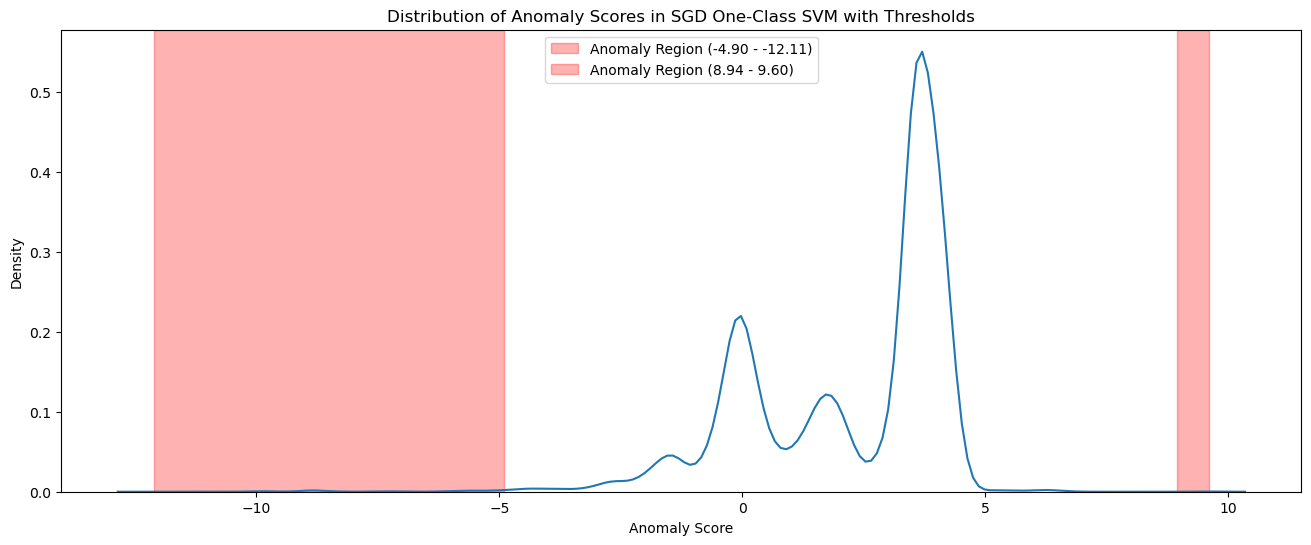

In [11]:
lower_sgd, upper_sgd = threshold_tukey(sgd_scores)

plt.figure(figsize=(16, 6))
sns.kdeplot(sgd_scores)
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.title('Distribution of Anomaly Scores in SGD One-Class SVM with Thresholds')
plt.axvspan(xmin=lower_sgd, xmax=min(sgd_scores), color='red', alpha=0.3, label=f"Anomaly Region ({lower_sgd:.2f} - {min(sgd_scores):.2f})")
plt.axvspan(xmin=upper_sgd, xmax=max(sgd_scores), color='red', alpha=0.3, label=f"Anomaly Region ({upper_sgd:.2f} - {max(sgd_scores):.2f})")
plt.legend()
plt.show()

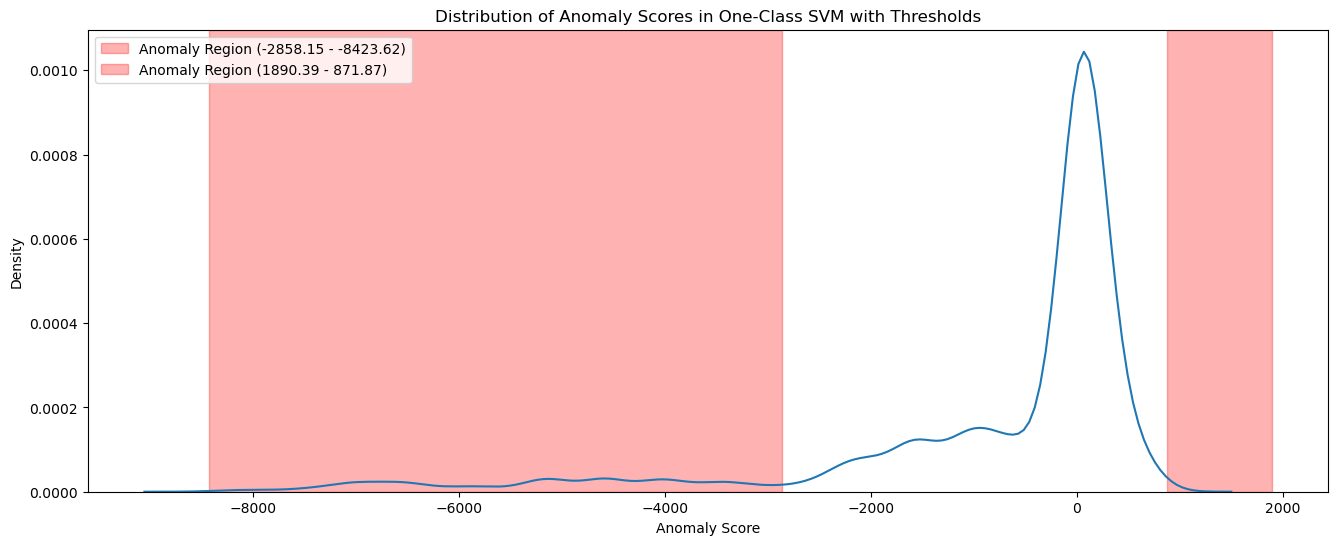

In [12]:
lower_ocsvm, upper_ocsvm = threshold_tukey(ocsvm_scores)

plt.figure(figsize=(16, 6))
sns.kdeplot(ocsvm_scores)
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.title('Distribution of Anomaly Scores in One-Class SVM with Thresholds')
plt.axvspan(xmin=lower_ocsvm, xmax=min(ocsvm_scores), color='red', alpha=0.3, label=f"Anomaly Region ({lower_ocsvm:.2f} - {min(ocsvm_scores):.2f})")
plt.axvspan(xmin=upper_ocsvm, xmax=max(ocsvm_scores), color='red', alpha=0.3, label=f"Anomaly Region ({upper_ocsvm:.2f} - {max(ocsvm_scores):.2f})")
plt.legend()
plt.show()

Number of flagged anomalies in isolation forest: 124
Percentege flagged anomalies and total anomaly score: 0.003531857928166567

Number of flagged anomalies in SGD One-Class SVM: 137
Percentege flagged anomalies and total anomaly score: 0.0039021333561195136

Number of flagged anomalies in One-Class SVM: 3647
Percentege flagged anomalies and total anomaly score: 0.10387649890341508


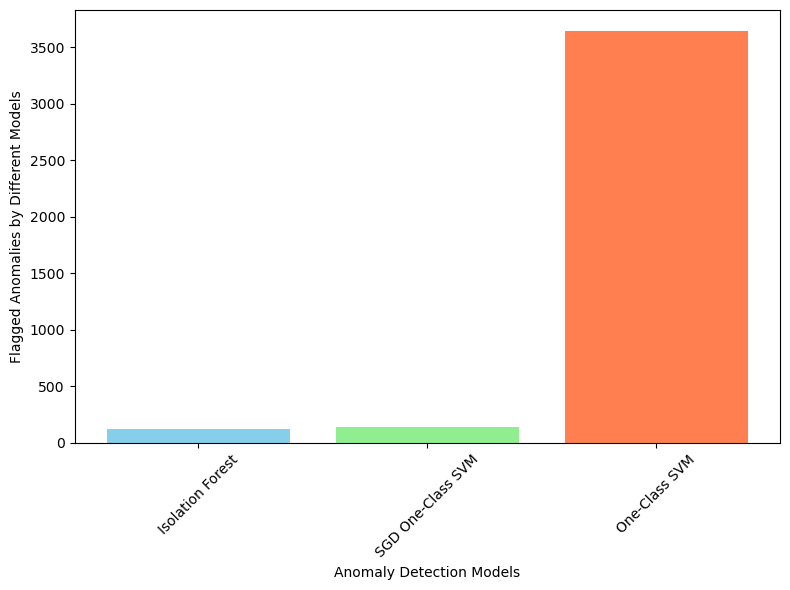

In [13]:
# check for flagged anomalies in each models

flagged_iso = [score for score in iso_scores if score < lower_iso or score > upper_iso]
print(f"Number of flagged anomalies in isolation forest: {len(flagged_iso)}")
print(f"Percentege flagged anomalies and total anomaly score: {len(flagged_iso)/len(iso_scores)}\n")

flagged_sgd = [score for score in sgd_scores if score < lower_sgd or score > upper_sgd]
print(f"Number of flagged anomalies in SGD One-Class SVM: {len(flagged_sgd)}")
print(f"Percentege flagged anomalies and total anomaly score: {len(flagged_sgd)/len(sgd_scores)}\n")

flagged_ocsvm = [score for score in ocsvm_scores if score < lower_ocsvm or score > upper_ocsvm]
print(f"Number of flagged anomalies in One-Class SVM: {len(flagged_ocsvm)}")
print(f"Percentege flagged anomalies and total anomaly score: {len(flagged_ocsvm)/len(ocsvm_scores)}")

methods = ['Isolation Forest', 'SGD One-Class SVM', 'One-Class SVM']
flagged_anomalies = [len(flagged_iso), len(flagged_sgd), len(flagged_ocsvm)]

# bar chart
plt.figure(figsize=(8, 6))
plt.bar(methods, flagged_anomalies, color=['skyblue', 'lightgreen', 'coral'])
plt.xlabel('Anomaly Detection Models')
plt.ylabel('Flagged Anomalies by Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# export thresholds values and models

import pickle

thresholds_models = {
    'iso': [lower_iso, upper_iso],
    'sgd_ocsvm': [lower_sgd, upper_sgd],
    'ocsvm': [lower_ocsvm, upper_ocsvm]
}

# save models
filename_iso = 'iso_models.sav'
filename_sgd_ocsvm = 'sgd_ocsvm_models.sav'
filename_ocsvm = 'ocsvm_models.sav'

pickle.dump(iso_forest, open(filename_iso, 'wb'))
pickle.dump(sgd_ocsvm, open(filename_sgd_ocsvm, 'wb'))
pickle.dump(ocsvm, open(filename_ocsvm, 'wb'))

# save fastext nlp model
model.save('server_log_nlp.bin')

# save thresholds as json
with open('thresholds.json', 'w') as outfile:
    json.dump(thresholds_models, outfile)